In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.fourtp.tests import test_init_rel, test_assign_rel


from graph2plan.fourtp.canonical_interfaces import CanonicalOrder
from graph2plan.fourtp.rel import plot_rel, RELVertexData
from graph2plan.dual.helpers import check_is_source_target_graph
from typing import NamedTuple

In [3]:
# G, pos, full_pos =  test_four_complete()

In [4]:
# pickle_co()

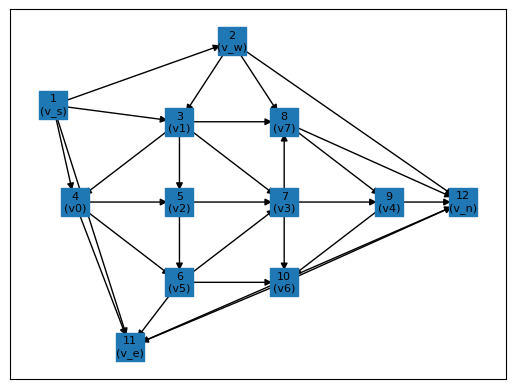

In [ ]:
test_init_rel()

rp, re: 1->11 | le, lp: 5->3
rp, re: 4->11 | le, lp: 7->5
rp, re: 4->6 | le, lp: 7->3
rp, re: 6->10 | le, lp: 8->3
rp, re: 6->11 | le, lp: 12->9
rp, re: 1->4 | le, lp: 8->2
rp, re: 7->9 | le, lp: 12->2
rp, re: 7->10 | le, lp: 12->8


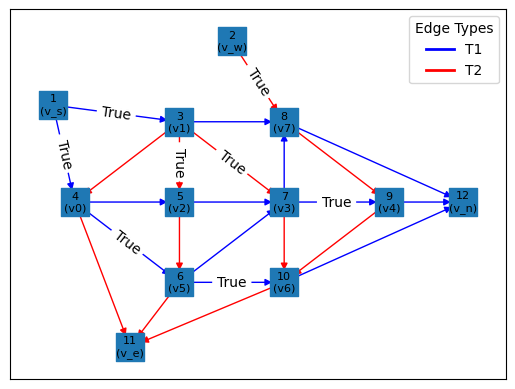

(<networkx.classes.digraph.DiGraph at 0x10ea16850>,
 <networkx.classes.digraph.DiGraph at 0x10ea15bd0>)

In [7]:
G = test_assign_rel()
G

In [6]:
G.nodes["v5"]

{'data': RELVertexData(left_edge='v3', right_edge='v_e', basis_edge='v0', left_point='v2', right_point='v0')}

In [ ]:
G4, T1, T2, G_c, cc = test_init_rel()
co: CanonicalOrder = cc


hi


In [6]:
T1.edges

OutEdgeView([('v5', 'v3'), ('v3', 'v7'), ('v0', 'v2'), ('v2', 'v5'), ('v7', 'v4'), ('v6', 'v_e'), ('v_e', 'v_n'), ('v4', 'v6'), ('v1', 'v0'), ('v_s', 'v_w'), ('v_w', 'v1')])

In [7]:
# show_co()

In [8]:
DNode = NamedTuple("DNode", [("node", str), ("vdata", RELVertexData)])
temp = [DNode(node, data["data"]) for node, data in G4.nodes(data=True)]
nodes = sorted(temp, key=lambda i: co.vertices[i.node].ordered_number)

print("node", ("left", "right"))
for node, d in nodes: 
    order = co.vertices[node].ordered_number
    left = co.vertices[d.left_edge].ordered_number if d.left_edge else ""
    right = co.vertices[d.right_edge].ordered_number if d.right_edge else ""
    basis = co.vertices[d.basis_edge].ordered_number if d.basis_edge else ""


    lp = co.vertices[d.left_point].ordered_number if d.left_point else ""
    rp = co.vertices[d.right_point].ordered_number if d.right_point else ""
    
    print(f"{order}-{node}: edges: {left, right, basis} points: {lp, rp}")


node ('left', 'right')
1-v_s: edges: (2, 11, '') points: ('', '')
2-v_w: edges: (3, 12, 1) points: ('', '')
3-v1: edges: (4, 8, 1) points: (1, 2)
4-v0: edges: (5, 11, 1) points: (1, 3)
5-v2: edges: (6, 7, 3) points: (3, 4)
6-v5: edges: (7, 11, 4) points: (4, 5)
7-v3: edges: (8, 10, 3) points: (3, 6)
8-v7: edges: (9, 12, 2) points: (2, 7)
9-v4: edges: (10, 12, 7) points: (7, 8)
10-v6: edges: (11, 12, 6) points: (6, 9)
11-v_e: edges: (12, 12, 1) points: (1, 10)
12-v_n: edges: ('', '', 2) points: (1, 11)


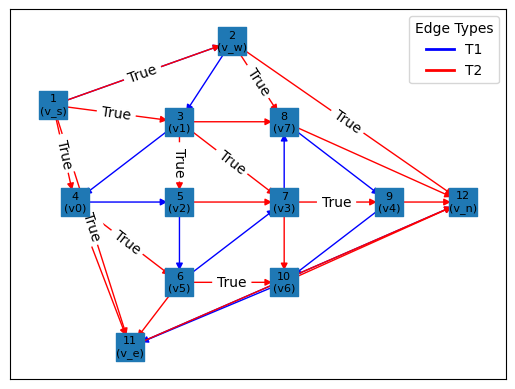

In [9]:
plot_rel(G4, T1, T2, G_c.full_pos, co)

In [30]:
frozenset(T1.edges)

frozenset({('v0', 'v2'),
           ('v1', 'v0'),
           ('v2', 'v5'),
           ('v3', 'v7'),
           ('v4', 'v6'),
           ('v5', 'v3'),
           ('v6', 'v_e'),
           ('v7', 'v4'),
           ('v_e', 'v_n'),
           ('v_s', 'v1'),
           ('v_w', 'v_s')})

In [32]:
frozenset(T2.edges)

frozenset({('v0', 'v5'),
           ('v0', 'v_e'),
           ('v1', 'v2'),
           ('v1', 'v3'),
           ('v1', 'v7'),
           ('v2', 'v3'),
           ('v3', 'v4'),
           ('v3', 'v6'),
           ('v4', 'v_n'),
           ('v5', 'v6'),
           ('v5', 'v_e'),
           ('v6', 'v_n'),
           ('v7', 'v_n'),
           ('v_e', 'v_n'),
           ('v_s', 'v0'),
           ('v_s', 'v_e'),
           ('v_w', 'v1'),
           ('v_w', 'v7'),
           ('v_w', 'v_n'),
           ('v_w', 'v_s')})

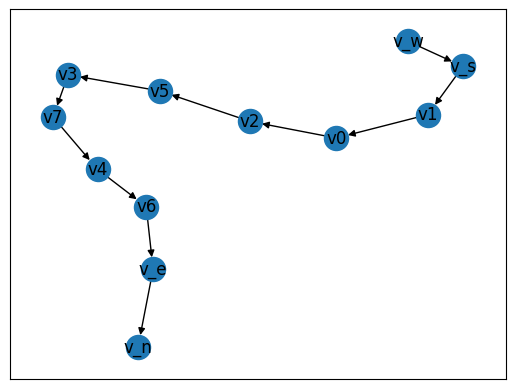

In [17]:
nx.draw_networkx(T1)

In [28]:
check_is_source_target_graph(T1)

('v_w', 'v_n')

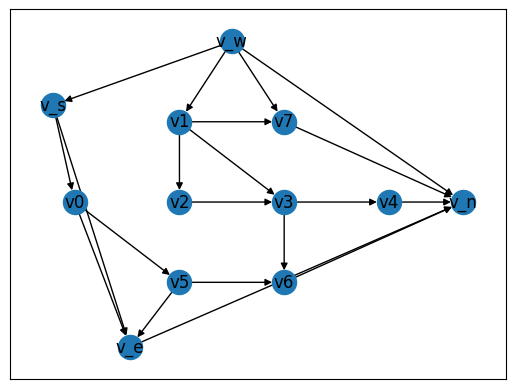

In [26]:
nx.draw_networkx(T2, G_c.full_pos)

In [27]:
check_is_source_target_graph(T2)

('v_w', 'v_n')

In [25]:
print("node", ("left", "right"))
for node, data in G4.nodes(data=True): 
    d:RELVertexData = data["data"]

    order = co.vertices[node].ordered_number
    left = co.vertices[d.left_point].ordered_number if d.left_point else ""
    right = co.vertices[d.right_point].ordered_number if d.right_point else ""
    print(f"{order}: {left, right}")

node ('left', 'right')
6: (4, 5)
4: (2, 3)
5: (3, 4)
7: (3, 6)
10: (6, 9)
9: (7, 8)
3: (1, 2)
8: (1, 7)
12: (1, 11)
11: (2, 10)
2: ('', '')
1: ('', '')


In [39]:
[((u,v), data) for u,v,data in T1.edges(data=True)]

[(('v5', 'v3'), {}),
 (('v5', 'v6'), {}),
 (('v3', 'v7'), {}),
 (('v3', 'v4'), {}),
 (('v0', 'v5'), {}),
 (('v0', 'v2'), {}),
 (('v2', 'v5'), {}),
 (('v7', 'v4'), {}),
 (('v7', 'v_n'), {}),
 (('v6', 'v_n'), {}),
 (('v4', 'v6'), {}),
 (('v4', 'v_n'), {}),
 (('v1', 'v0'), {}),
 (('v_s', 'v1'), {}),
 (('v_s', 'v0'), {})]

In [ ]:
T1.e

In [ ]:
lambda u,v, data: (u,v)

In [22]:
from functools import partial

In [29]:
def meta_filter_edge(G, val, n1, n2):
    return G[n1][n2].get("basis", val)

In [30]:
fT1 = partial(meta_filter_edge, T1, True)

In [20]:
def filter_edge(n1, n2):
    return T1[n1][n2].get("basis", True)

In [ ]:
fT1("v5", "v7")

In [31]:
view = nx.subgraph_view(T1, filter_edge=fT1)
view.edges

OutEdgeView([('v5', 'v3'), ('v5', 'v6'), ('v3', 'v7'), ('v3', 'v4'), ('v0', 'v5'), ('v0', 'v2'), ('v2', 'v5'), ('v7', 'v4'), ('v7', 'v_n'), ('v6', 'v_n'), ('v4', 'v6'), ('v4', 'v_n'), ('v1', 'v0'), ('v_s', 'v1'), ('v_s', 'v0')])

[]

In [ ]:
T1.remove_nodes_from()

In [21]:
T2.edges

OutEdgeView([('v5', 'v6'), ('v6', 'v_n'), ('v0', 'v1'), ('v1', 'v_w'), ('v2', 'v1'), ('v3', 'v7'), ('v7', 'v_n'), ('v4', 'v_n')])

In [7]:
g

In [8]:
g.nodes["v1"]

{'data': RELVertexData(left_edge='v7', right_edge='v_w', basis_edge='v_s', left_point='v_s', right_point='v3')}

In [13]:
g.nodes(data=True)

NodeDataView({'v5': {'data': RELVertexData(left_edge='v2', right_edge='v6', basis_edge='v_e', left_point='v0', right_point='v_e')}, 'v0': {'data': RELVertexData(left_edge='v5', right_edge='v1', basis_edge='v_s', left_point='v_e', right_point='v_s')}, 'v2': {'data': RELVertexData(left_edge='v3', right_edge='v1', basis_edge='v0', left_point='v0', right_point='v5')}, 'v3': {'data': RELVertexData(left_edge='v6', right_edge='v7', basis_edge='v5', left_point='v2', right_point='v5')}, 'v6': {'data': RELVertexData(left_edge='v4', right_edge='v_n', basis_edge='v_e', left_point='v3', right_point='v_e')}, 'v4': {'data': RELVertexData(left_edge='v7', right_edge='v_n', basis_edge='v3', left_point='v3', right_point='v6')}, 'v1': {'data': RELVertexData(left_edge='v7', right_edge='v_w', basis_edge='v_s', left_point='v_s', right_point='v3')}, 'v7': {'data': RELVertexData(left_edge='v_w', right_edge='v_n', basis_edge='v3', left_point='v1', right_point='v4')}, 'v_n': {'data': RELVertexData(left_edge='', 

In [22]:
cw_nbs = [11, 9, 7, 5]
overlap = [11,7,5,9]

In [23]:
[x for _, x in sorted(zip(cw_nbs, overlap), key=lambda pair: pair[0])]


[9, 5, 7, 11]

In [25]:
[i for i in zip(cw_nbs, overlap)]

[(11, 11), (9, 7), (7, 5), (5, 9)]

In [27]:
[i for i in sorted(zip(cw_nbs, overlap), key=lambda pair: pair[0], reverse=True)]

[(11, 11), (9, 7), (7, 5), (5, 9)]